<a href="https://colab.research.google.com/github/Tajyu/TensorFlow-Tutotrial/blob/main/Simply_Write/%EB%B0%B0%EC%B9%98%EC%A0%95%EA%B7%9C%ED%99%94%EC%99%80_%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 배치 정규화(Batch Normalization)
## 신경망에 데이터를 입력으로 넣을 때는 스케일러를 활용해 모든 데이터를 공통 범위로 배치한다.
## 매우 다른 크기의 데이터는 다른 크기의 활성화를 생성하는 경향이 있어 훈련을 불안정하게 된다.


### StandarScaler: 평균과 표준편차 활용 (평균을 제거하고 데이터를 분산으로 조정)
### MinMaxScaler: 최대/최소값이 각각 1과 0이 되도록 한다. -> 단점: 이상치가있을때 예쁘게 안나옴.
### RobustScaler: 이상치 영향을 최소화함, IQR 활용.

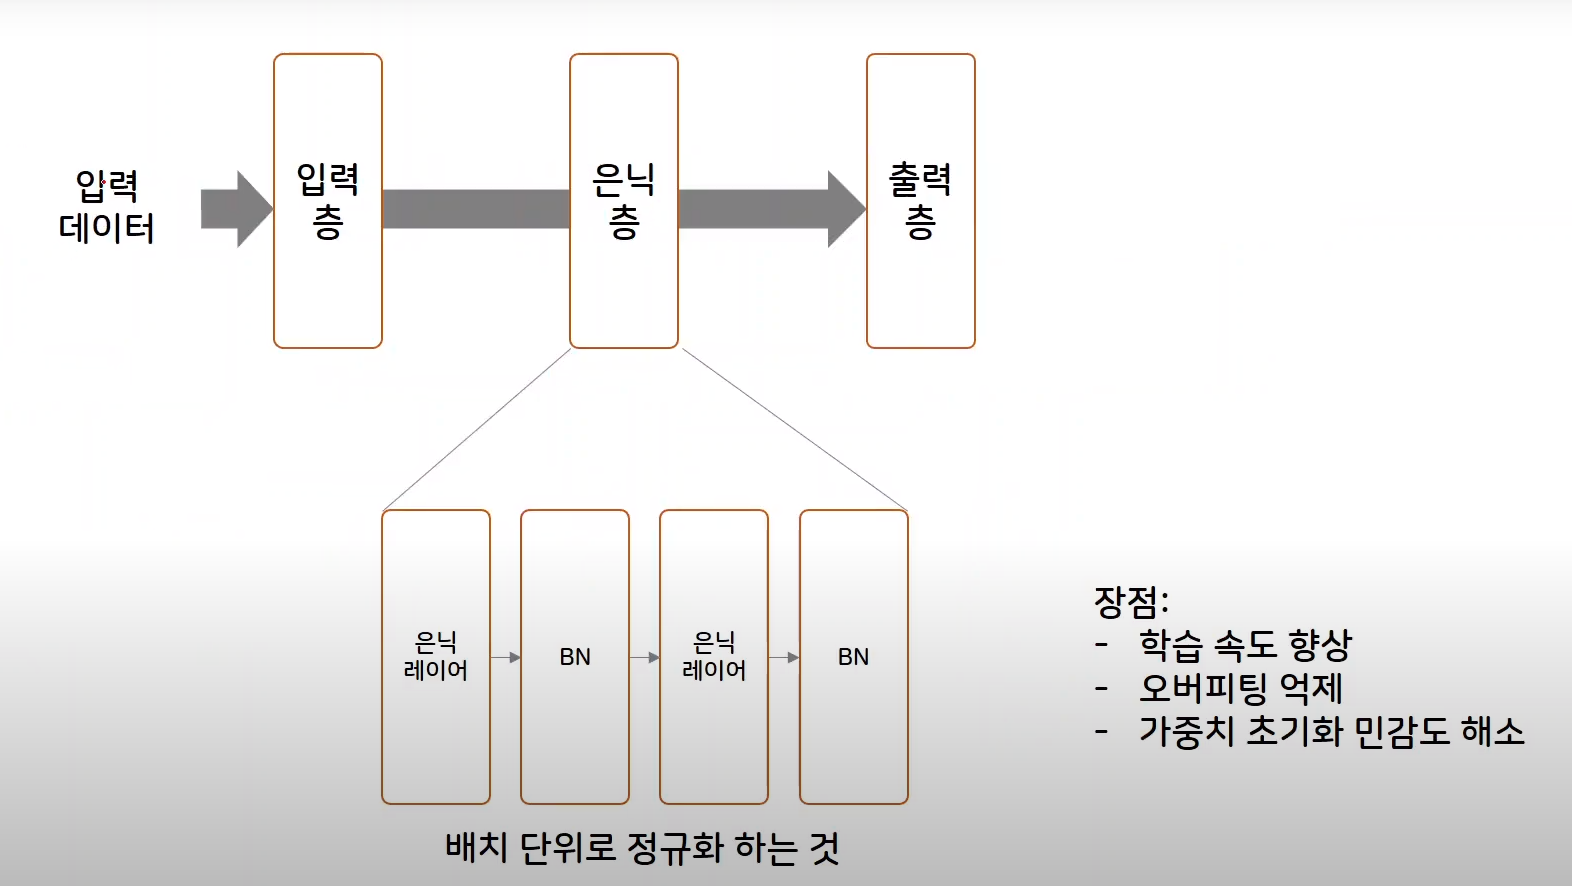

In [9]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Mnist 데이터세트 불러오기
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 배치 정규화해서 모델 생성

In [11]:
# 모델 생성(배치 정규화)
model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    BatchNormalization(), # 배치 정규화
                    Dense(64, activation = "relu"),
                    BatchNormalization(), # 배치 정규화
                    Dense(10, activation = "softmax")
])

In [12]:
# 모델 컴파일
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

# 훈련(학습)
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 10, batch_size = 64)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.3283 - accuracy: 0.9046 - val_loss: 0.4791 - val_accuracy: 0.9470
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1585 - accuracy: 0.9537 - val_loss: 0.5423 - val_accuracy: 0.9576
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1143 - accuracy: 0.9659 - val_loss: 0.5446 - val_accuracy: 0.9605
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0928 - accuracy: 0.9721 - val_loss: 0.4305 - val_accuracy: 0.9643
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0791 - accuracy: 0.9753 - val_loss: 0.4826 - val_accuracy: 0.9667
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0681 - accuracy: 0.9789 - val_loss: 0.4547 - val_accuracy: 0.9625
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0582 - accuracy: 0.9819 - val_loss: 0.4399 - val_accuracy: 0.9642
Epoch 

# 드롭아웃(Dropout): 임의로 레이어를 생략한다.

### Dropout해서 모델 생성

In [13]:
# 모델 생성(배치 정규화)
model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dropout(0.2), # Dropout
                    BatchNormalization(), # 배치 정규화
                    Dense(64, activation = "relu"),
                    Dropout(0.2), # Dropout
                    BatchNormalization(), # 배치 정규화
                    Dense(10, activation = "softmax")
])

In [14]:
# 모델 컴파일
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

# 훈련(학습)
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 10, batch_size = 64)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.4890 - accuracy: 0.8514 - val_loss: 0.3047 - val_accuracy: 0.9398
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2814 - accuracy: 0.9145 - val_loss: 0.3123 - val_accuracy: 0.9531
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2323 - accuracy: 0.9299 - val_loss: 0.4531 - val_accuracy: 0.9600
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2070 - accuracy: 0.9362 - val_loss: 0.3186 - val_accuracy: 0.9645
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1906 - accuracy: 0.9408 - val_loss: 0.2228 - val_accuracy: 0.9642
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1803 - accuracy: 0.9438 - val_loss: 0.3208 - val_accuracy: 0.9657
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1706 - accuracy: 0.9468 - val_loss: 0.2548 - val_accuracy: 0.9668
Epoch 

### Dropout 추가시 accuracy 조금 향상